In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import f_oneway

In [44]:
distance_df = pd.read_csv('distance.csv')
pellet_df = pd.read_csv('pellet.csv')

In [3]:
distance_df.head()

,Day,Date,Time,201808 reversal1-25:Irrad,201808 reversal1-26:Sham,201808 reversal1-28:Irrad,201809 reversal-13:Sham,201809 reversal-14:Irrad,201809 reversal-15:Irrad,201809 reversal-16:Sham,...,201811 reversal1-18:Sham,201811 reversal1-20:Irrad,201811 reversal2-21:Irrad,201811 reversal2-22:Sham,201811 reversal2-23:Sham,201811 reversal2-24:Irrad,201812 reversal-1:Sham,201812 reversal-2:Irrad,201812 reversal-3:Sham,201812 reversal-4:Irrad
0,-5,5/27/50,17:12,NaN,NaN,NaN,203.462,165.051,0.0,160.431,...,112.264,0.0,0.0,183.325,101.892,233.284,131.395,208.479,141.803,231.773
1,-5,5/27/50,17:13,NaN,NaN,NaN,133.539,189.141,0.0,152.866,...,187.448,0.0,0.0,164.514,165.498,173.539,147.012,149.991,161.234,287.352
2,-5,5/27/50,17:14,NaN,NaN,NaN,13.632,202.818,0.0,10.340,...,95.392,0.0,0.0,130.638,45.457,182.345,121.037,216.182,128.220,222.124
3,-5,5/27/50,17:15,NaN,NaN,NaN,77.649,0.000,0.0,75.035,...,101.233,0.0,0.0,111.376,0.000,166.933,134.530,259.667,147.407,267.275
4,-5,5/27/50,17:16,NaN,NaN,NaN,219.045,0.000,0.0,18.502,...,0.000,0.0,0.0,72.598,0.000,250.807,214.366,135.046,158.703,178.139


In [4]:
pellet_df.head()

,Day,Date,Time,201808 reversal1-25:Irrad,201808 reversal1-26:Sham,201808 reversal1-28:Irrad,201809 reversal-13:Sham,201809 reversal-14:Irrad,201809 reversal-15:Irrad,201809 reversal-16:Sham,...,201811 reversal1-18:Sham,201811 reversal1-20:Irrad,201811 reversal2-21:Irrad,201811 reversal2-22:Sham,201811 reversal2-23:Sham,201811 reversal2-24:Irrad,201812 reversal-1:Sham,201812 reversal-2:Irrad,201812 reversal-3:Sham,201812 reversal-4:Irrad
0,-5,5/27/50,17:12,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-5,5/27/50,17:13,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-5,5/27/50,17:14,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-5,5/27/50,17:15,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-5,5/27/50,17:16,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
distance_df.shape

(19709, 24)

In [6]:
pellet_df.shape

(19709, 24)

In [7]:
#distance_filt.shape

## Filter Distance Data

In [51]:
#eliminate due to NA values
distance_filt = distance_df.drop(['201808 reversal1-25:Irrad', '201808 reversal1-26:Sham', 
                                 '201808 reversal1-28:Irrad'], axis=1)
distance_filt.head()

,Day,Date,Time,201809 reversal-13:Sham,201809 reversal-14:Irrad,201809 reversal-15:Irrad,201809 reversal-16:Sham,201810 reversal-17:Sham,201810 reversal-18:Irrad,201810 reversal-20:Sham,...,201811 reversal1-18:Sham,201811 reversal1-20:Irrad,201811 reversal2-21:Irrad,201811 reversal2-22:Sham,201811 reversal2-23:Sham,201811 reversal2-24:Irrad,201812 reversal-1:Sham,201812 reversal-2:Irrad,201812 reversal-3:Sham,201812 reversal-4:Irrad
0,-5,5/27/50,17:12,203.462,165.051,0.0,160.431,22.830,64.380,357.014,...,112.264,0.0,0.0,183.325,101.892,233.284,131.395,208.479,141.803,231.773
1,-5,5/27/50,17:13,133.539,189.141,0.0,152.866,77.129,122.548,225.947,...,187.448,0.0,0.0,164.514,165.498,173.539,147.012,149.991,161.234,287.352
2,-5,5/27/50,17:14,13.632,202.818,0.0,10.340,32.856,121.389,182.863,...,95.392,0.0,0.0,130.638,45.457,182.345,121.037,216.182,128.220,222.124
3,-5,5/27/50,17:15,77.649,0.000,0.0,75.035,79.196,116.402,194.682,...,101.233,0.0,0.0,111.376,0.000,166.933,134.530,259.667,147.407,267.275
4,-5,5/27/50,17:16,219.045,0.000,0.0,18.502,97.081,181.265,286.284,...,0.000,0.0,0.0,72.598,0.000,250.807,214.366,135.046,158.703,178.139


In [58]:
# distance_day contains the sum of distance consumed per day on the 6 days after irrad
# This matches the description of figure 2 used in the paper

distance_day = distance_filt.groupby('Day').agg(sum)
distance_day['Temp'] = np.arange(15)

distance_day = distance_day.add_prefix('dist_')
distance_day = distance_day.rename({'dist_Temp':'Temp'},axis=1)
distance_day

,dist_201809 reversal-13:Sham,dist_201809 reversal-14:Irrad,dist_201809 reversal-15:Irrad,dist_201809 reversal-16:Sham,dist_201810 reversal-17:Sham,dist_201810 reversal-18:Irrad,dist_201810 reversal-20:Sham,dist_201811 reversal1-17:Irrad,dist_201811 reversal1-18:Sham,dist_201811 reversal1-20:Irrad,dist_201811 reversal2-21:Irrad,dist_201811 reversal2-22:Sham,dist_201811 reversal2-23:Sham,dist_201811 reversal2-24:Irrad,dist_201812 reversal-1:Sham,dist_201812 reversal-2:Irrad,dist_201812 reversal-3:Sham,dist_201812 reversal-4:Irrad,Temp
Day,,,,,,,,,,,,,,,,,,,
-5,52294.800,71377.730,47377.851,49562.836,78124.041,47768.512,33158.714,65794.764,43586.181,48028.808,75667.133,76249.147,62663.512,101128.524,64704.708,41456.946,74503.024,97658.611,0
-4,42136.560,54165.125,39978.723,36172.973,42522.598,23611.912,21525.133,38192.833,25562.252,42153.002,46343.678,56731.093,63373.086,56848.053,43640.563,28078.686,42790.204,69630.508,1
-3,38555.946,57246.684,27726.028,36087.512,31807.025,19614.099,19282.446,26301.593,30634.481,43849.583,47010.380,36365.530,67444.510,54606.206,34142.258,27086.150,33607.904,50633.031,2
-2,44079.400,61406.858,25970.985,42269.677,46795.292,17536.902,25085.581,36990.166,29888.724,63103.721,48434.430,46982.019,49156.391,82487.966,35170.118,36018.996,47246.500,58638.723,3
-1,32473.808,46547.123,23524.307,28800.185,28366.281,11751.612,25361.173,27151.089,28503.555,41273.705,36912.560,31491.974,37994.382,58137.974,26299.449,27407.976,34909.564,43532.181,4
0,19902.748,22081.573,19567.238,17070.376,12892.950,7041.473,12675.013,12424.742,7685.075,14038.660,16693.870,14773.543,15134.329,17689.966,11792.814,20811.135,14085.373,10344.654,5
1,12928.702,22489.372,17319.799,13524.144,10106.943,6418.638,10098.272,16303.478,4819.336,8798.131,8853.349,6936.255,12297.957,6495.821,5737.338,6906.379,2032.046,2885.423,6
2,21372.168,20823.683,15353.379,18589.051,29874.931,11425.751,23900.644,19106.055,24034.453,7822.150,7063.836,32492.697,28178.690,4750.579,31476.683,10460.202,12697.675,6189.569,7
3,22746.579,8684.703,10935.917,24006.112,22805.239,7110.406,24794.147,16074.319,21609.721,14369.621,12466.907,32881.839,33166.127,11718.710,32840.810,9376.281,28845.125,11940.090,8


In [59]:
# Notice that Irrad period started at day 0 and stopped at day 3

dist_pre_irrad = distance_day.copy()
dist_pre_irrad = dist_pre_irrad[dist_pre_irrad['Temp'] < 5]
dist_pre_irrad

,dist_201809 reversal-13:Sham,dist_201809 reversal-14:Irrad,dist_201809 reversal-15:Irrad,dist_201809 reversal-16:Sham,dist_201810 reversal-17:Sham,dist_201810 reversal-18:Irrad,dist_201810 reversal-20:Sham,dist_201811 reversal1-17:Irrad,dist_201811 reversal1-18:Sham,dist_201811 reversal1-20:Irrad,dist_201811 reversal2-21:Irrad,dist_201811 reversal2-22:Sham,dist_201811 reversal2-23:Sham,dist_201811 reversal2-24:Irrad,dist_201812 reversal-1:Sham,dist_201812 reversal-2:Irrad,dist_201812 reversal-3:Sham,dist_201812 reversal-4:Irrad,Temp
Day,,,,,,,,,,,,,,,,,,,
-5,52294.800,71377.730,47377.851,49562.836,78124.041,47768.512,33158.714,65794.764,43586.181,48028.808,75667.133,76249.147,62663.512,101128.524,64704.708,41456.946,74503.024,97658.611,0
-4,42136.560,54165.125,39978.723,36172.973,42522.598,23611.912,21525.133,38192.833,25562.252,42153.002,46343.678,56731.093,63373.086,56848.053,43640.563,28078.686,42790.204,69630.508,1
-3,38555.946,57246.684,27726.028,36087.512,31807.025,19614.099,19282.446,26301.593,30634.481,43849.583,47010.380,36365.530,67444.510,54606.206,34142.258,27086.150,33607.904,50633.031,2
-2,44079.400,61406.858,25970.985,42269.677,46795.292,17536.902,25085.581,36990.166,29888.724,63103.721,48434.430,46982.019,49156.391,82487.966,35170.118,36018.996,47246.500,58638.723,3
-1,32473.808,46547.123,23524.307,28800.185,28366.281,11751.612,25361.173,27151.089,28503.555,41273.705,36912.560,31491.974,37994.382,58137.974,26299.449,27407.976,34909.564,43532.181,4


In [68]:
dist_post_irrad = distance_day.copy()
dist_post_irrad = dist_post_irrad[dist_post_irrad['Temp'] > 7].take([0, 1, 2, 3, 4, 5])
dist_post_irrad

,dist_201809 reversal-13:Sham,dist_201809 reversal-14:Irrad,dist_201809 reversal-15:Irrad,dist_201809 reversal-16:Sham,dist_201810 reversal-17:Sham,dist_201810 reversal-18:Irrad,dist_201810 reversal-20:Sham,dist_201811 reversal1-17:Irrad,dist_201811 reversal1-18:Sham,dist_201811 reversal1-20:Irrad,dist_201811 reversal2-21:Irrad,dist_201811 reversal2-22:Sham,dist_201811 reversal2-23:Sham,dist_201811 reversal2-24:Irrad,dist_201812 reversal-1:Sham,dist_201812 reversal-2:Irrad,dist_201812 reversal-3:Sham,dist_201812 reversal-4:Irrad,Temp
Day,,,,,,,,,,,,,,,,,,,
3,22746.579,8684.703,10935.917,24006.112,22805.239,7110.406,24794.147,16074.319,21609.721,14369.621,12466.907,32881.839,33166.127,11718.710,32840.810,9376.281,28845.125,11940.090,8
4,19001.605,20562.699,8453.470,21815.452,23560.761,6571.682,17174.979,18248.776,23109.063,11233.145,15837.525,35229.915,33766.087,11286.262,21621.970,11054.157,32468.168,23956.695,9
5,25285.286,28030.139,15116.845,27538.106,31764.201,10527.515,23874.844,20842.887,30613.736,21595.329,16514.439,34672.792,41987.786,15839.651,21623.550,15548.826,30066.341,22450.769,10
6,26376.807,24336.862,18930.374,21128.673,23920.306,11701.457,19900.103,19834.042,27993.681,23932.651,23627.532,33000.975,34135.056,31042.237,21736.184,23298.431,37448.915,23260.388,11
7,24182.029,23499.580,19672.966,21249.165,26402.698,11109.903,15128.755,16336.041,23619.720,20597.345,17629.677,30940.777,33617.644,24755.426,17456.817,16922.228,29912.427,21044.084,12
8,27387.809,26282.395,19845.338,23165.341,24072.883,11995.083,15411.227,13949.916,25416.421,20400.734,20372.387,35402.188,42691.497,26070.807,21373.601,18414.157,32636.082,27070.428,13


In [61]:
# Separate pre and post distances into sham and Irrad
sham_pre_dist = dist_pre_irrad.filter(regex=('[m]$'))
irrad_pre_dist = dist_pre_irrad.filter(regex=('[d]$'))
sham_post_dist = dist_post_irrad.filter(regex=('[m]$'))
irrad_post_dist = dist_post_irrad.filter(regex=('[d]$'))

In [62]:
#sham_baseline = [round(sum(sham_pre_dist[x])) for x in sham_pre_dist.columns]
#sham_baseline = [round(np.mean(sham_pre_dist[x])) for x in sham_pre_dist.columns]
sham_baseline = list(sham_pre_dist.iloc[-1].values)

for i in range(len(sham_baseline)):
    sham_baseline[i] = int(round(sham_baseline[i]))

sham_baseline

[32474, 28800, 28366, 25361, 28504, 31492, 37994, 26299, 34910]

In [63]:
#irrad_baseline = [round(sum(irrad_pre_dist[x])) for x in irrad_pre_dist.columns]
irrad_baseline = [round(np.mean(irrad_pre_dist[x])) for x in irrad_pre_dist.columns]
irrad_baseline

[58149, 32916, 24057, 38886, 47682, 50874, 70642, 32010, 64019]

In [64]:
#sham_new = [round(sum(sham_post_dist[x])) for x in sham_post_dist.columns]
sham_new = [round(np.mean(sham_post_dist[x])) for x in sham_post_dist.columns]
sham_new

[24163, 23150, 25421, 19381, 25394, 33688, 36561, 22775, 31896]

In [24]:
#irrad_new = [round(sum(irrad_post_dist[x])) for x in irrad_post_dist.columns]
irrad_new = [round(np.mean(irrad_post_dist[x])) for x in irrad_post_dist.columns]
irrad_new

[21899, 15492, 9836, 17548, 18688, 17741, 20119, 15769, 21620]

In [25]:
# Takes in two arrays of the same size and returns an array of the percentage change
def percent_change(baseline, new):
    if len(baseline) != len(new):
        return 'Arrays are not the same size'
    else:
        values = []
        for i in range(len(baseline)):
            values.append(round(100*(baseline[i]-new[i])/baseline[i]))
        return values

In [26]:
delta_irrad = percent_change(irrad_baseline, irrad_new)
delta_irrad

[62, 53, 59, 55, 61, 65, 72, 51, 66]

In [27]:
delta_sham = percent_change(sham_baseline, sham_new)
delta_sham

[26, 20, 10, 24, 11, -7, 4, 13, 9]

Text(0.5, 1.0, '')

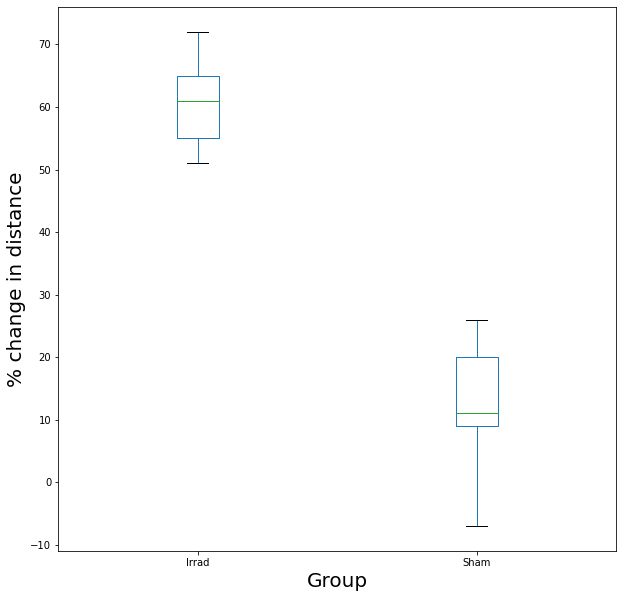

In [85]:
# Replication of Fig 3B
# Plots the distribution of the percentage change from pre irradiation to post irradiation
delta_dist_df = pd.DataFrame()
delta_dist_df['Irrad'] = delta_irrad
delta_dist_df['Sham'] = delta_sham

#boxplot_dist = delta_dist_df.boxplot(column=['Irrad', 'Sham'], grid=False)

plt.figure(figsize=(10,10))
bplot_dist = delta_dist_df.boxplot(column=['Irrad', 'Sham'], grid=False)

bplot_dist.set_xlabel('Group', fontsize = 20)
bplot_dist.set_ylabel('% change in distance', fontsize = 20)
bplot_dist.set_title('', fontsize = 20)

In [43]:
F, p = f_oneway(delta_irrad, delta_sham)
print(f'F stat: {F}, p-value: {p}')

F stat: 138.624471021159, p-value: 2.7089772735309064e-09


## Filter Pellet Data

In [45]:
pellet_filt = pellet_df.drop(['201808 reversal1-25:Irrad', '201808 reversal1-26:Sham', 
                                 '201808 reversal1-28:Irrad'], axis=1)
pellet_filt.head()

,Day,Date,Time,201809 reversal-13:Sham,201809 reversal-14:Irrad,201809 reversal-15:Irrad,201809 reversal-16:Sham,201810 reversal-17:Sham,201810 reversal-18:Irrad,201810 reversal-20:Sham,...,201811 reversal1-18:Sham,201811 reversal1-20:Irrad,201811 reversal2-21:Irrad,201811 reversal2-22:Sham,201811 reversal2-23:Sham,201811 reversal2-24:Irrad,201812 reversal-1:Sham,201812 reversal-2:Irrad,201812 reversal-3:Sham,201812 reversal-4:Irrad
0,-5,5/27/50,17:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-5,5/27/50,17:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-5,5/27/50,17:14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-5,5/27/50,17:15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-5,5/27/50,17:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# pellet_day contains the average of pellets consumed per day on the 6 days after irrad
# This matches the description of figure 2 used in the paper

pellet_day = pellet_filt.groupby('Day').agg(sum)

# Notice that Irrad period started at day 0 and stopped at day 2

pellet_day['Temp'] = np.arange(15)
pellet_day = pellet_day[pellet_day['Temp'] > 7]
pellet_day = pellet_day[pellet_day['Temp'] < 14].drop('Temp', axis=1)
pellet_day = dist_post_irrad.add_prefix('pellet_')
pellet_day = pellet_day.rename({'pellet_Temp':'Temp'},axis=1)
pellet_day.columns

Index(['pellet_dist_201809 reversal-13:Sham',
       'pellet_dist_201809 reversal-14:Irrad',
       'pellet_dist_201809 reversal-15:Irrad',
       'pellet_dist_201809 reversal-16:Sham',
       'pellet_dist_201810 reversal-17:Sham',
       'pellet_dist_201810 reversal-18:Irrad',
       'pellet_dist_201810 reversal-20:Sham',
       'pellet_dist_201811 reversal1-17:Irrad',
       'pellet_dist_201811 reversal1-18:Sham',
       'pellet_dist_201811 reversal1-20:Irrad',
       'pellet_dist_201811 reversal2-21:Irrad',
       'pellet_dist_201811 reversal2-22:Sham',
       'pellet_dist_201811 reversal2-23:Sham',
       'pellet_dist_201811 reversal2-24:Irrad',
       'pellet_dist_201812 reversal-1:Sham',
       'pellet_dist_201812 reversal-2:Irrad',
       'pellet_dist_201812 reversal-3:Sham',
       'pellet_dist_201812 reversal-4:Irrad', 'Temp'],
      dtype='object')

In [34]:
# Separate pellets_day into sham and Irrad
sham_pellets = pellet_day.filter(regex=('[m]$'))
irrad_pellets = pellet_day.filter(regex=('[d]$'))

In [35]:
sham_means = [round(np.mean(sham_pellets[x])) for x in sham_pellets.columns]
sham_means

[173, 176, 165, 174, 154, 169, 136, 154, 130]

In [36]:
irrad_means = [round(np.mean(irrad_pellets[x])) for x in irrad_pellets.columns]
irrad_means

[140, 74, 93, 136, 133, 101, 102, 101, 133]

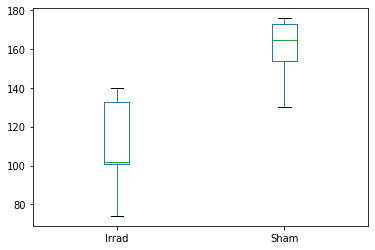

In [37]:
# Replication of Fig 3C
pellet_df = pd.DataFrame()
pellet_df['Irrad'] = irrad_means
pellet_df['Sham'] = sham_means

boxplot_pellets = pellet_df.boxplot(column=['Irrad', 'Sham'], grid=False)

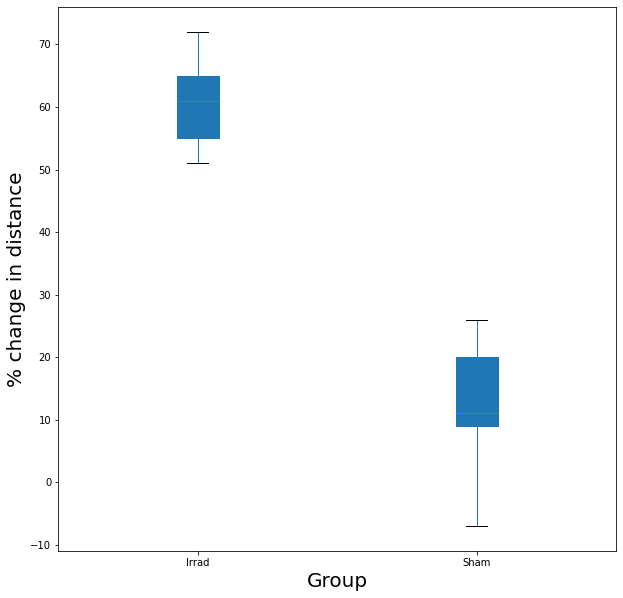

In [118]:
# Replication of Fig 3B
delta_dist_df = pd.DataFrame()
delta_dist_df['Irrad'] = delta_irrad
delta_dist_df['Sham'] = delta_sham

#boxplot_dist = delta_dist_df.boxplot(column=['Irrad', 'Sham'], grid=False)
#colors = ['red', 'blue']
#for patch, color in zip(bplot_dist['boxes'], colors):
    #patch.set_facecolor(color)

#USE CODE BELOW AS REF TO GEN OTHER FIGURES
plt.figure(figsize=(10,10))
bplot_dist = delta_dist_df.boxplot(column=['Irrad', 'Sham'], grid=False, patch_artist=True)

bplot_dist.set_xlabel('Group', fontsize = 20)
bplot_dist.set_ylabel('% change in distance', fontsize = 20)
bplot_dist.set_title('', fontsize = 20)

plt.show()

In [41]:
F, p = f_oneway(irrad_means, sham_means)
print(f'F stat: {F}, p-value: {p}')

F stat: 23.347118757307506, p-value: 0.00018398007362564287


In [117]:
irrad_pellet_df = pd.DataFrame({'mice':range(0,9), 'pellet':irrad_means})
irrad_pellet_df['mice'] = 'I' + irrad_pellet_df['mice'].astype(str)
irrad_pellet_df

,mice,pellet
0,I0,140
1,I1,74
2,I2,93
3,I3,136
4,I4,133
5,I5,101
6,I6,102
7,I7,101
8,I8,133


In [71]:
merged_df = dist_post_irrad.merge(pellet_day, left_on = 'Day', right_on = 'Day')
merged_df

,dist_201809 reversal-13:Sham,dist_201809 reversal-14:Irrad,dist_201809 reversal-15:Irrad,dist_201809 reversal-16:Sham,dist_201810 reversal-17:Sham,dist_201810 reversal-18:Irrad,dist_201810 reversal-20:Sham,dist_201811 reversal1-17:Irrad,dist_201811 reversal1-18:Sham,dist_201811 reversal1-20:Irrad,...,pellet_dist_201811 reversal1-20:Irrad,pellet_dist_201811 reversal2-21:Irrad,pellet_dist_201811 reversal2-22:Sham,pellet_dist_201811 reversal2-23:Sham,pellet_dist_201811 reversal2-24:Irrad,pellet_dist_201812 reversal-1:Sham,pellet_dist_201812 reversal-2:Irrad,pellet_dist_201812 reversal-3:Sham,pellet_dist_201812 reversal-4:Irrad,Temp_y
Day,,,,,,,,,,,,,,,,,,,,,
3,22746.579,8684.703,10935.917,24006.112,22805.239,7110.406,24794.147,16074.319,21609.721,14369.621,...,14369.621,12466.907,32881.839,33166.127,11718.710,32840.810,9376.281,28845.125,11940.090,8
4,19001.605,20562.699,8453.470,21815.452,23560.761,6571.682,17174.979,18248.776,23109.063,11233.145,...,11233.145,15837.525,35229.915,33766.087,11286.262,21621.970,11054.157,32468.168,23956.695,9
5,25285.286,28030.139,15116.845,27538.106,31764.201,10527.515,23874.844,20842.887,30613.736,21595.329,...,21595.329,16514.439,34672.792,41987.786,15839.651,21623.550,15548.826,30066.341,22450.769,10
6,26376.807,24336.862,18930.374,21128.673,23920.306,11701.457,19900.103,19834.042,27993.681,23932.651,...,23932.651,23627.532,33000.975,34135.056,31042.237,21736.184,23298.431,37448.915,23260.388,11
7,24182.029,23499.580,19672.966,21249.165,26402.698,11109.903,15128.755,16336.041,23619.720,20597.345,...,20597.345,17629.677,30940.777,33617.644,24755.426,17456.817,16922.228,29912.427,21044.084,12
8,27387.809,26282.395,19845.338,23165.341,24072.883,11995.083,15411.227,13949.916,25416.421,20400.734,...,20400.734,20372.387,35402.188,42691.497,26070.807,21373.601,18414.157,32636.082,27070.428,13


In [102]:
#create df from above
new_merged = pd.DataFrame()
new_merged['pellet'] = merged_df.mean(axis=0)
new_merged

,pellet
dist_201809 reversal-13:Sham,24163.352500
dist_201809 reversal-14:Irrad,21899.396333
dist_201809 reversal-15:Irrad,15492.485000
dist_201809 reversal-16:Sham,23150.474833
dist_201810 reversal-17:Sham,25421.014667
dist_201810 reversal-18:Irrad,9836.007667
dist_201810 reversal-20:Sham,19380.675833
dist_201811 reversal1-17:Irrad,17547.663500
dist_201811 reversal1-18:Sham,25393.723667
dist_201811 reversal1-20:Irrad,18688.137500


In [ ]:
sns.scatterplot(merged_df.groupby('full_sentence')['CoRT'].mean(), dataframe.groupby('full_sentence')['CoRT'].std())